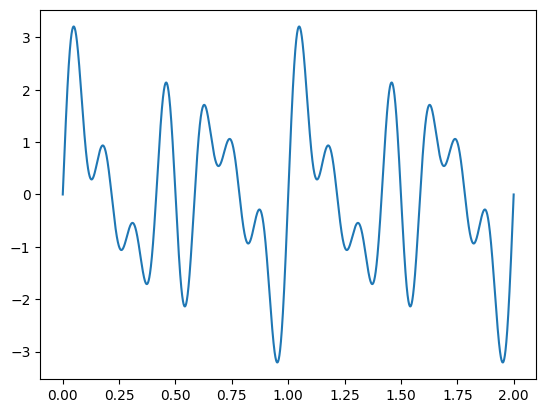

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(0, 2, 10000)

def gen_signal(freqs: list[int], t = T):
  base = np.zeros(t.shape)
  for freq in freqs:
    base += np.sin(2 * np.pi * freq * t)
  return base

plt.plot(T, gen_signal([2, 3, 5, 7]))

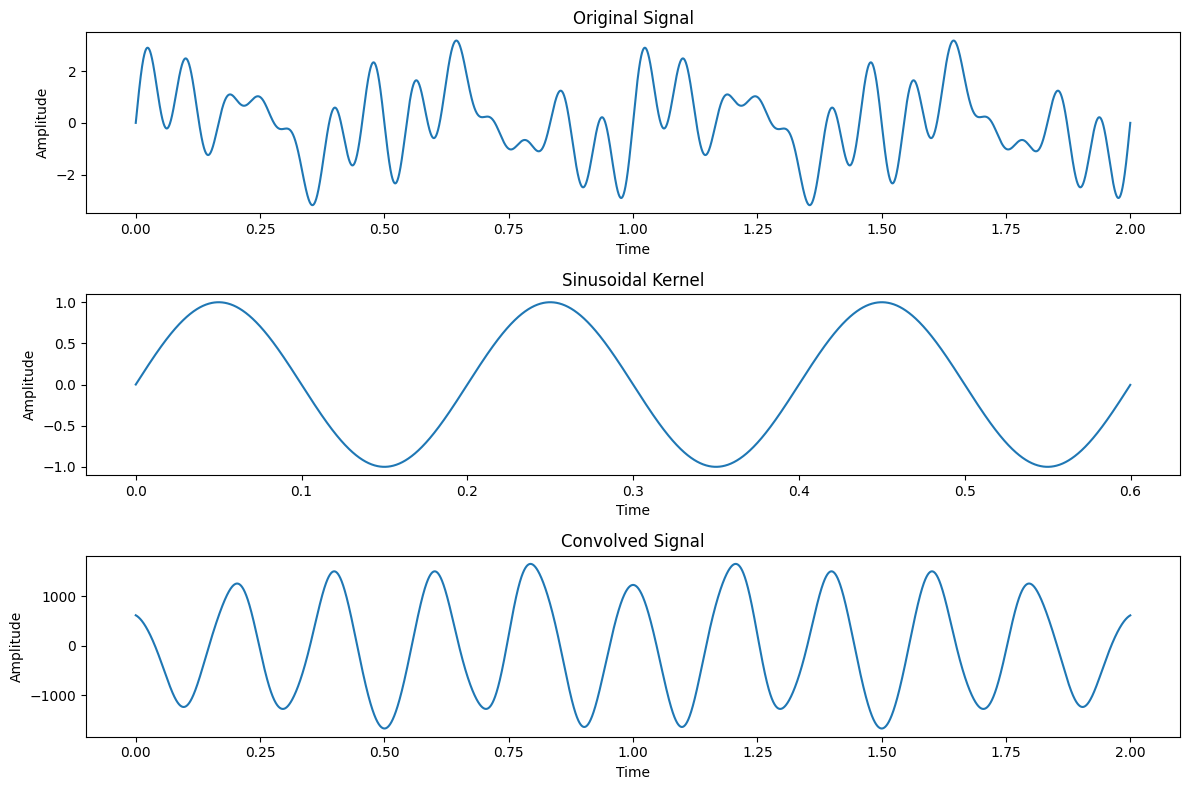

In [2]:
from scipy.signal import convolve

# Define the signal
signal = gen_signal([2, 5, 11, 13])

sinusoidal_kernel_freq = 5
sinusoidal_kernel_len = 3000
sinusoidal_kernel = np.sin(2 * np.pi * sinusoidal_kernel_freq * T[:sinusoidal_kernel_len]) # Use a shorter segment as the kernel

# Convolve the signal with the sinusoidal kernel
convolved_signal = convolve(signal, sinusoidal_kernel, mode='same')

# Plot the original signal, the kernel, and the convolved signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(T, signal)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(T[:sinusoidal_kernel_len], sinusoidal_kernel)
plt.title('Sinusoidal Kernel')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(T, convolved_signal)
plt.title('Convolved Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

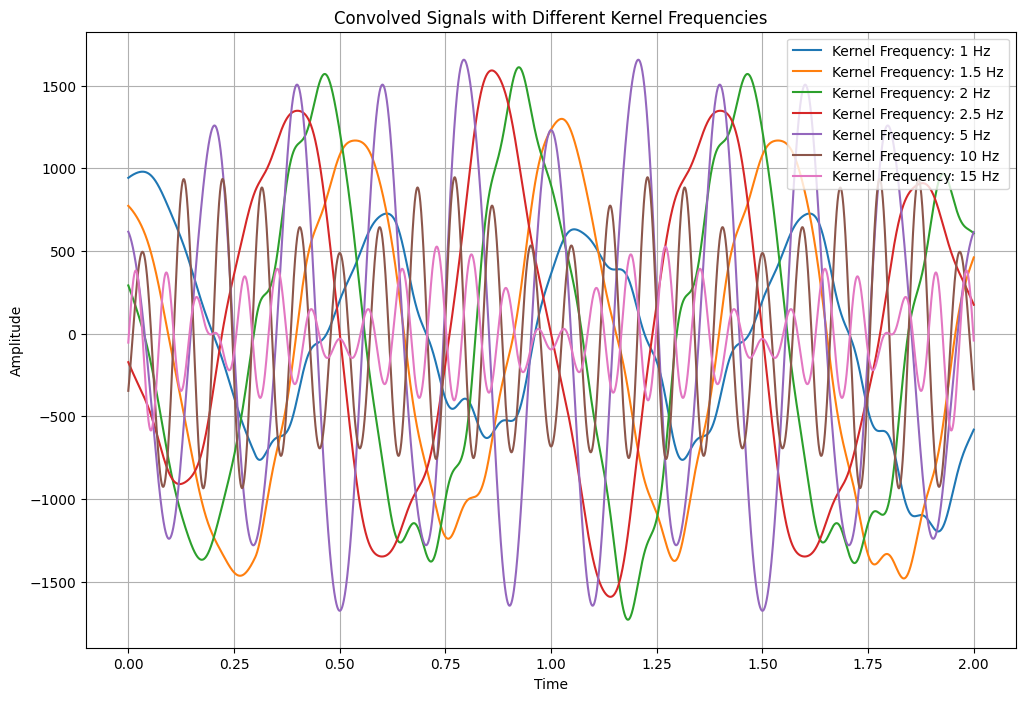

In [3]:
# Define a list of frequencies for the kernels
kernel_frequencies = [1, 1.5, 2, 2.5, 5, 10, 15] # Example frequencies

plt.figure(figsize=(12, 8))

for freq in kernel_frequencies:
  # Create a sinusoidal kernel for the current frequency
  sinusoidal_kernel = np.sin(2 * np.pi * freq * T[:sinusoidal_kernel_len])

  # Convolve the signal with the current kernel
  convolved_signal = convolve(signal, sinusoidal_kernel, mode='same')

  # Plot the convolved signal on the same plot
  plt.plot(T, convolved_signal, label=f'Kernel Frequency: {freq} Hz')

plt.title('Convolved Signals with Different Kernel Frequencies')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

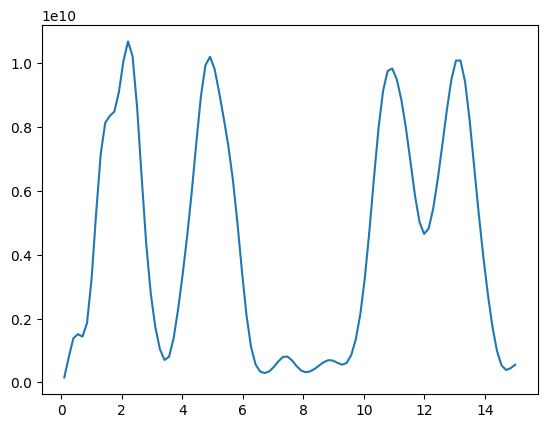

In [4]:
freqs = np.linspace(0.1, 15, 100)
power = np.zeros(freqs.shape)

for i, freq in enumerate(freqs):
  kernel = np.sin(2 * np.pi * freq * T[:sinusoidal_kernel_len])
  convolved_signal = convolve(signal, kernel, mode='same')
  power[i] = np.sum(convolved_signal ** 2)

plt.plot(freqs, power)
plt.show()

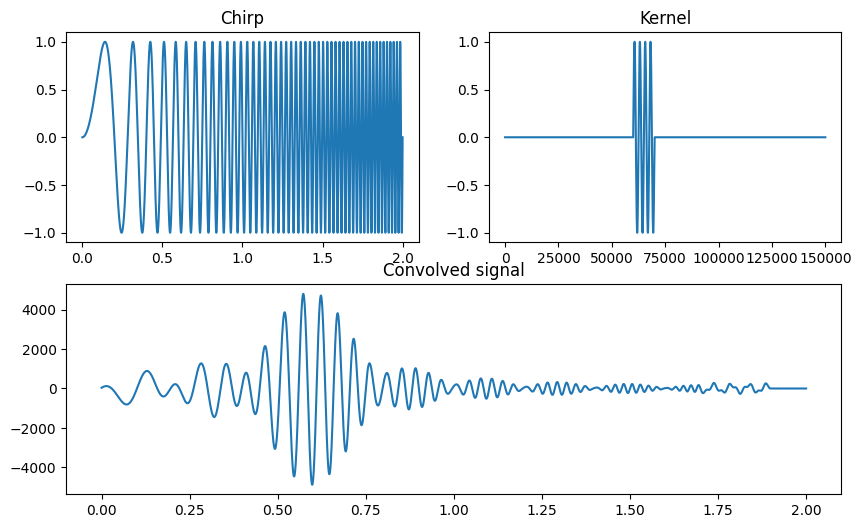

In [5]:
import matplotlib.gridspec as gridspec

T = np.linspace(0, 2, 100000)

def sinusoidal_kernel_windowed(f, t_0=0.0, window_width=0.1, t=T):
    TF = t[-1]
    kernel = np.zeros(int(1.5*len(t)))
    i_0 = int(t_0*len(T)/TF)
    n = int(window_width*len(T)/TF)
    kernel[i_0:i_0+n] = np.sin(2 * np.pi * f * t[:n])
    return kernel

def chirp(f_inicial: float = 0, f_final: float= 10, A: float=1.0, t=T):
  f = np.linspace(f_inicial, f_final, t.size)
  return A*np.sin(np.pi*t*f)

signal = chirp(f_final=50)

fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 2)  # 2 filas, 2 columnas

axs0 = fig.add_subplot(gs[0,0])
axs0.plot(T, signal)
axs0.set_title('Chirp')

axs1 = fig.add_subplot(gs[0,1])
f = 20
kernel = sinusoidal_kernel_windowed(f, 1.2, window_width=4/f)
axs1.plot(kernel)
axs1.set_title("Kernel")

axs2 = fig.add_subplot(gs[1,:])
convolved_signal = convolve(signal, kernel, mode='same')
axs2.plot(T, convolved_signal)
axs2.set_title("Convolved signal")

plt.show()

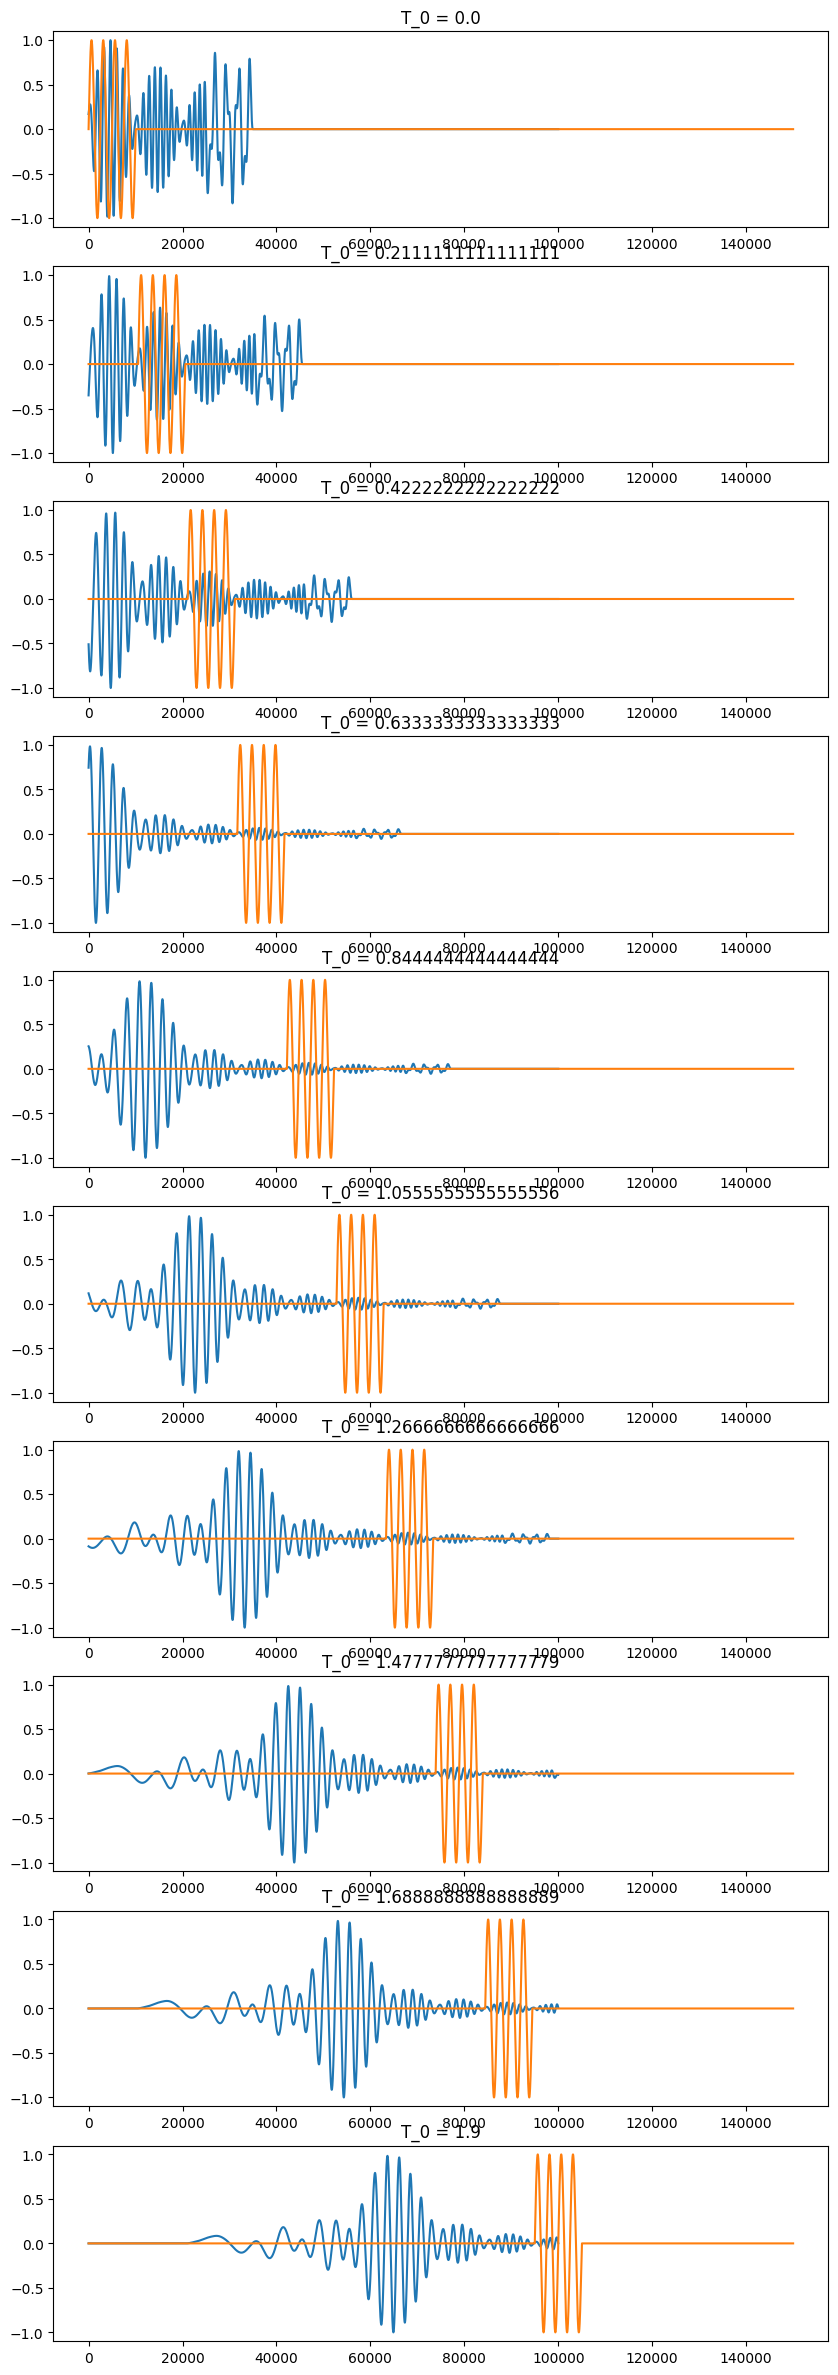

In [6]:
N = 10
T_0 = np.linspace(0, T[-1]-0.1, N)
fig, axs = plt.subplots(N, 1, figsize=(10, 30))
f = 20
for i in range(N):
    kernel = sinusoidal_kernel_windowed(f, T_0[i], window_width=4/f)
    convolved_signal = convolve(signal, kernel, mode='same')
    convolved_signal = convolved_signal/np.max(np.abs(convolved_signal))
    axs[i].plot(convolved_signal)
    axs[i].plot(kernel/np.max(np.abs(kernel)))
    axs[i].set_title(f"T_0 = {T_0[i]}")
plt.show()



100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


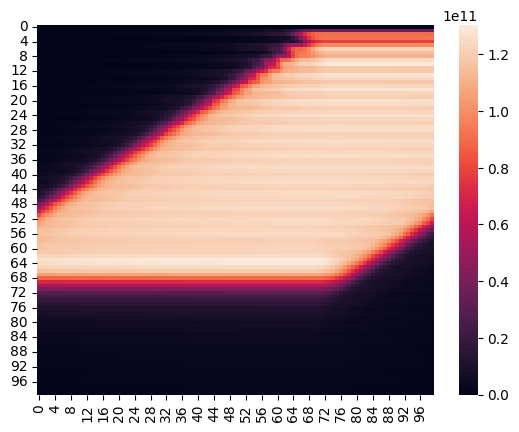

In [7]:
from seaborn import heatmap
from tqdm import tqdm

N = 100
M = 100
T_0 = np.linspace(0, T[-1]-0.1, N)
fs = np.linspace(0, 70, M)

power = np.zeros((M,N))
for j in tqdm(range(M)):
    for i in range(N):
        kernel = sinusoidal_kernel_windowed(fs[j], T_0[i], window_width=4/f)
        convolved_signal = convolve(signal, kernel, mode='same')
        power[j][i] = np.sum(convolved_signal ** 2)

heatmap(power)
plt.show()